# Data Collection

In [3]:
import urllib.request
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup

In [4]:
import pprint
import time
from selenium.webdriver.common.by import By

In [18]:
POSITION_MEDIAN_SALARIES = {
        "software-engineer":161000, 
        "product-designer":135000,
        "product-manager":190000,
        "technical-program-manager":202000,
        "solution-architect": 177350,
        "security-analyst":129000,
        "technical-writer":120000,
        "sales-engineer":195750,
        "investment-banker":180000,
        "business-development":174700,
        "biomedical-engineer":119900,
        "hardware-engineer":190000,
        "mechanical-engineer":107800,
        "accountant":86000,
        "data-scientist":153500, 
        "business-analyst":100000
    }

POSITION_AREA = {
        "software-engineer":"Technology", 
        "product-designer":"Technology",
        "product-manager":"Technology",
        "technical-program-manager":"Technology",
        "solution-architect": "Technology",
        "security-analyst":"Technology",
        "technical-writer":"Technology",
        "sales-engineer":"Engineering",
        "investment-banker":"Business",
        "business-development":"Business",
        "biomedical-engineer":"Engineering",
        "hardware-engineer":"Engineering",
        "mechanical-engineer":"Engineering",
        "accountant":"Business",
        "data-scientist":"Technology", 
        "business-analyst":"Business"
    }

In [5]:
def scrape_page(driver, position: str, page: int, limit: int):
    page += 1
    url = f"https://www.levels.fyi/t/{position}?countryId=254&offset={page*limit}&limit={limit}"
    driver.get(url)
    time.sleep(10)
    return driver.find_elements(By.TAG_NAME, "td")

In [6]:
def parse_contents(position: str, page_contents: list, writer):
    i = 0
    term = True
    while(term):
        temp = {}
        temp["Title"] = position
        temp["title_median_salary"] = POSITION_MEDIAN_SALARIES[position]
        temp["Company/Location/Date"] = page_contents[i].text
        temp["Level_Name/Tag"] = page_contents[i+1].text
        temp["Total_Yrs_Exp/Yrs_Exp_At_Company"] = page_contents[i+2].text
        temp["Total_Comp/Itemized_Comp"] = page_contents[i+3].text
        i+=4
        writer.writerow(temp)
        try:
            page_contents[i+3]
        except:
            term = False
            break
        if("Negotiate up" in page_contents[i].text or "mentorship" in page_contents[i].text):
            i+=1

In [7]:
def get_all_pages(driver, position: str, writer, num_mined_pages: int = 19, page_limit: int = 50):
    for i in range(num_mined_pages):
        page_contents = scrape_page(driver, position,i,page_limit)
        parse_contents(position,page_contents,writer)
        if(i == 10):
            print("Page: "+str(i))

In [8]:
def get_all_pages_for_positions(positions: list,  writer):
    for position in positions:
        print("Starting up browser")
        driver = webdriver.Chrome(ChromeDriverManager().install())
        url = f"https://www.levels.fyi/t/{position}?countryId=254&offset=0&limit=50"
        driver.get(url)
        print(f"Waiting for {url}")
        time.sleep(35)
        l = driver.find_element(By.CLASS_NAME,"css-1q3lwpg")
        driver.execute_script("arguments[0].click();", l)
        time.sleep(5)
        l = driver.find_element(By.CLASS_NAME,"css-boyo6o")
        driver.execute_script("arguments[0].click();", l)
        print("Buttons Clicked!")
        print("-- "+position+" -- ")
        get_all_pages(driver,position,writer)
        driver.quit()

In [9]:
import csv
def write_data_to_csv(iterator):
    position_titles = list(POSITION_MEDIAN_SALARIES.keys())
    data_file = open(f"levels-{position_titles[iterator]}.csv", "w")
    writer = csv.DictWriter(data_file,
                            fieldnames=["Title",
                                        "title_median_salary",
                                        "Company/Location/Date",
                                        "Level_Name/Tag",
                                        "Total_Yrs_Exp/Yrs_Exp_At_Company",
                                        "Total_Comp/Itemized_Comp"])
    writer.writeheader()

    get_all_pages_for_positions([position_titles[iterator]],writer)


In [33]:
POSITION_MEDIAN_SALARIES.keys()

dict_keys(['software-engineer', 'product-designer', 'product-manager', 'technical-program-manager', 'solution-architect', 'security-analyst', 'technical-writer', 'sales-engineer', 'investment-banker', 'business-development', 'biomedical-engineer', 'hardware-engineer', 'mechanical-engineer', 'accountant', 'data-scientist', 'business-analyst'])

In [11]:
for i in range(7,len(list(POSITION_MEDIAN_SALARIES.keys()))):
    try:
        write_data_to_csv(i)
    except:
        print(f"Errored - {list(POSITION_MEDIAN_SALARIES.keys())[i]}")

Starting up browser


/var/folders/_h/hm4whgn109v7shcjkyc9sgqm0000gn/T/ipykernel_54198/3155847195.py:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


Waiting for https://www.levels.fyi/t/sales-engineer?countryId=254&offset=0&limit=50
Buttons Clicked!
-- sales-engineer -- 
Errored - sales-engineer
Starting up browser
Waiting for https://www.levels.fyi/t/investment-banker?countryId=254&offset=0&limit=50
Buttons Clicked!
-- investment-banker -- 
Errored - investment-banker
Starting up browser
Waiting for https://www.levels.fyi/t/business-development?countryId=254&offset=0&limit=50
Buttons Clicked!
-- business-development -- 
Errored - business-development
Starting up browser
Waiting for https://www.levels.fyi/t/biomedical-engineer?countryId=254&offset=0&limit=50
Buttons Clicked!
-- biomedical-engineer -- 
Errored - biomedical-engineer
Starting up browser
Waiting for https://www.levels.fyi/t/hardware-engineer?countryId=254&offset=0&limit=50
Buttons Clicked!
-- hardware-engineer -- 
Page: 10
Errored - hardware-engineer
Starting up browser
Waiting for https://www.levels.fyi/t/mechanical-engineer?countryId=254&offset=0&limit=50
Buttons Cli

# Data Preprocessing

In [12]:
import pandas as pd
import os

In [15]:
datasets = []
files = os.listdir("./Data")
for file in files:
    datasets.append(pd.read_csv(f"./Data/{file}"))

## Combing Each Job Titles Data

In [16]:
combined_df = pd.concat(datasets)
print(combined_df.shape)
combined_df = combined_df.dropna()
combined_df = combined_df.drop_duplicates()
print(combined_df.shape)

(10369, 6)
(10357, 6)


In [22]:
col = combined_df["Title"].to_list()
area = []
for i in range(len(col)):
    area.append(POSITION_AREA[col[i]])
combined_df['industry'] = area

### Processing Company Name and State into a usable format

In [24]:
col = combined_df["Company/Location/Date"].to_list()
company_name = []
state = []
for i in range(len(col)):
    temp = col[i].replace('|', ',').replace('\n', ',').split(',')
    company_name.append(temp[0])
    try:
        state.append(temp[2])
    except:
        state.append('0')
combined_df['state'] = state
combined_df['company_name'] = company_name
combined_df.head()

,Title,title_median_salary,Company/Location/Date,Level_Name/Tag,Total_Yrs_Exp/Yrs_Exp_At_Company,Total_Comp/Itemized_Comp,industry,state,company_name
0,sales-engineer,195750,"Sales Engineer\nLos Angeles, CA | 09/27/2022",hidden\nhidden,0-1 yrs\n0-1 yrs,"$120,000\n120K | N/A | N/A",Engineering,CA,Sales Engineer
1,sales-engineer,195750,"Sales Engineer\nOrlando, FL | 09/27/2022",hidden\nhidden,11+ yrs\n0-1 yrs,"$240,000\n168K | N/A | N/A",Engineering,FL,Sales Engineer
2,sales-engineer,195750,"Sales Engineer\nAustin, TX | 09/24/2022",hidden\nhidden,11+ yrs\n2-4 yrs,"$170,000\n140K | N/A | N/A",Engineering,TX,Sales Engineer
3,sales-engineer,195750,"IBM\nAtlanta, GA | 09/22/2022",Band 6\nTechnical Sales,0 yrs\n0 yrs,"$101,500\n81.5K | N/A | 20K",Engineering,GA,IBM
4,sales-engineer,195750,"Zoom\nDallas, TX | 09/20/2022",ZP3\nCollaboration,24 yrs\n2 yrs,"$216,000\n162K | N/A | N/A",Engineering,TX,Zoom


In [25]:
print(combined_df.shape)
combined_df = combined_df[combined_df['state'] != '0']
print(combined_df.shape)

(10357, 9)
(10357, 9)


### Processing Total Years Experience into a usable format

In [26]:
col = combined_df["Total_Yrs_Exp/Yrs_Exp_At_Company"].to_list()
total_yrs_exp = []
for i in range(len(col)):
    temp = col[i].split(' ')[0]
    if('-' in temp):
        total_yrs_exp.append(int(temp.split('-')[1]))
    elif('+' in temp):
        total_yrs_exp.append(int(temp.split('+')[0]))
    else:
        total_yrs_exp.append(int(temp))
combined_df['total_yrs_exp'] = total_yrs_exp

### Processing Years Experience at Company into a usable format

In [27]:
col = combined_df["Total_Yrs_Exp/Yrs_Exp_At_Company"].to_list()
company_yrs_exp = []
for i in range(len(col)):
    temp = col[i].split('\n')[1]
    temp = temp.split(' ')[0]
    if('-' in temp):
        company_yrs_exp.append(int(temp.split('-')[1]))
    elif('+' in temp):
        company_yrs_exp.append(int(temp.split('+')[0]))
    else:
        company_yrs_exp.append(int(temp))

combined_df['company_yrs_exp'] = company_yrs_exp


### Processing Total Compensation into a usable format

In [28]:
col = combined_df["Total_Comp/Itemized_Comp"].to_list()
comp = []
for i in range(len(col)):
    temp = col[i].replace('$', '').replace(',', '').split('\n')[0]
    if('+' in temp):
        temp = '0'
    comp.append(int(temp))
combined_df['total_comp'] = comp

In [29]:
print(combined_df.shape)
combined_df = combined_df[combined_df['total_comp'] > 0]
print(combined_df.shape)

(10357, 12)
(10190, 12)


### Engineering a Feature that Represents City of Employment and Population 

In [30]:
df = pd.read_csv("sig-cities.csv")
cities = df["Cities"].to_list()

col = combined_df["Company/Location/Date"].to_list()
locations = []
for i in range(len(col)):
    temp = col[i].split('\n')[1]
    temp = temp.split(',')[0]
    if temp in cities:
        locations.append(1)
    else:
        locations.append(0)
combined_df['pop_city_greater_65K'] = locations

In [31]:
abbr_df = pd.read_csv("50+States.csv")
state_median_income = pd.read_csv("state_median_income.csv")
state_median_income = pd.merge(state_median_income,abbr_df,on="State")

### Engineering a Feature to Represent State Median Income

In [32]:
col = combined_df["state"].to_list()
states_median_income_col = [] 
for i in range(len(col)):
    try:
        states_median_income_col.append(state_median_income[state_median_income["Abbr"] == col[i].replace(' ','')]["HouseholdIncome"].values[0])
    except:
        states_median_income_col.append(0)

combined_df["state_median_income"] = states_median_income_col
combined_df = combined_df[combined_df['state_median_income'] > 0]

### Engineering a Feature to Represent FAANG jobs or not

In [33]:
col = combined_df["company_name"].to_list()
faang = [] 
for i in range(len(col)):
    if(col[i] in ["Facebook","Meta","Amazon","AWS","Amazon Web Services","Apple","Netflix","Google","Alphabet"]):
        faang.append(1)
    else:
        faang.append(0)
        
combined_df["faang"] = faang
combined_df.shape

(10181, 15)

### Remove unneeded features

### One Hot Encode Industry

In [34]:
encoded = pd.get_dummies(combined_df['industry'])
# combined_df = combined_df.drop('Industry',axis=1)
levels_df = pd.concat([combined_df,encoded], axis=1)
levels_df.head()

,Title,title_median_salary,Company/Location/Date,Level_Name/Tag,Total_Yrs_Exp/Yrs_Exp_At_Company,Total_Comp/Itemized_Comp,industry,state,company_name,total_yrs_exp,company_yrs_exp,total_comp,pop_city_greater_65K,state_median_income,faang,Business,Engineering,Technology
0,sales-engineer,195750,"Sales Engineer\nLos Angeles, CA | 09/27/2022",hidden\nhidden,0-1 yrs\n0-1 yrs,"$120,000\n120K | N/A | N/A",Engineering,CA,Sales Engineer,1,1,120000,1,78672,0,0,1,0
1,sales-engineer,195750,"Sales Engineer\nOrlando, FL | 09/27/2022",hidden\nhidden,11+ yrs\n0-1 yrs,"$240,000\n168K | N/A | N/A",Engineering,FL,Sales Engineer,11,1,240000,1,57703,0,0,1,0
2,sales-engineer,195750,"Sales Engineer\nAustin, TX | 09/24/2022",hidden\nhidden,11+ yrs\n2-4 yrs,"$170,000\n140K | N/A | N/A",Engineering,TX,Sales Engineer,11,4,170000,1,63826,0,0,1,0
3,sales-engineer,195750,"IBM\nAtlanta, GA | 09/22/2022",Band 6\nTechnical Sales,0 yrs\n0 yrs,"$101,500\n81.5K | N/A | 20K",Engineering,GA,IBM,0,0,101500,1,61224,0,0,1,0
4,sales-engineer,195750,"Zoom\nDallas, TX | 09/20/2022",ZP3\nCollaboration,24 yrs\n2 yrs,"$216,000\n162K | N/A | N/A",Engineering,TX,Zoom,24,2,216000,1,63826,0,0,1,0


In [48]:
levels_df.to_csv("levels_data.csv")

In [46]:
for label in ["Company/Location/Date","Level_Name/Tag","Total_Yrs_Exp/Yrs_Exp_At_Company","Total_Comp/Itemized_Comp","state","company_name","Title"]:
    levels_df.drop(label,axis=1,inplace=True)
levels_df.head()

,title_median_salary,industry,total_yrs_exp,company_yrs_exp,total_comp,pop_city_greater_65K,state_median_income,faang,Business,Engineering,Technology
0,195750,Engineering,1,1,120000,1,78672,0,0,1,0
1,195750,Engineering,11,1,240000,1,57703,0,0,1,0
2,195750,Engineering,11,4,170000,1,63826,0,0,1,0
3,195750,Engineering,0,0,101500,1,61224,0,0,1,0
4,195750,Engineering,24,2,216000,1,63826,0,0,1,0


In [47]:
levels_df.drop("industry",axis=1,inplace=True)

In [49]:
levels_df.shape

(10181, 10)

### Checking Shape of Data

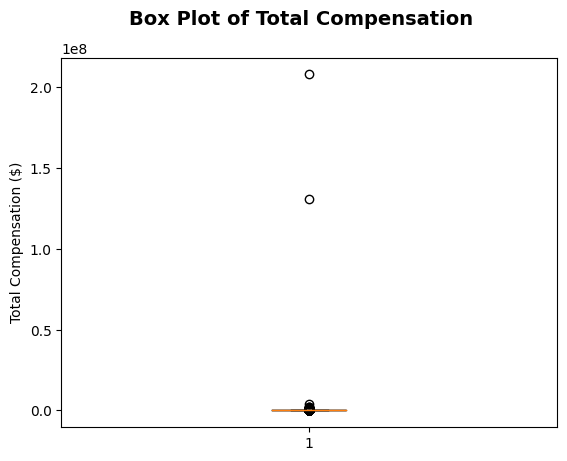

In [35]:
import matplotlib.pyplot as plt

fig = plt.figure()
fig.suptitle('Box Plot of Total Compensation', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
ax.boxplot(levels_df["total_comp"])
ax.set_ylabel('Total Compensation ($)')

### Removing Outliers

In [512]:
import numpy as np

q3, q1 = np.percentile(levels_df["total_comp"], [75 ,25])
iqr = q3 - q1
upper_limit = q3+iqr

In [515]:
print(levels_df.shape)
levels_df = levels_df[levels_df["total_comp"] < upper_limit]
print(levels_df.shape)

(4454, 11)
(4046, 11)


Text(0, 0.5, 'Total Compensation ($)')

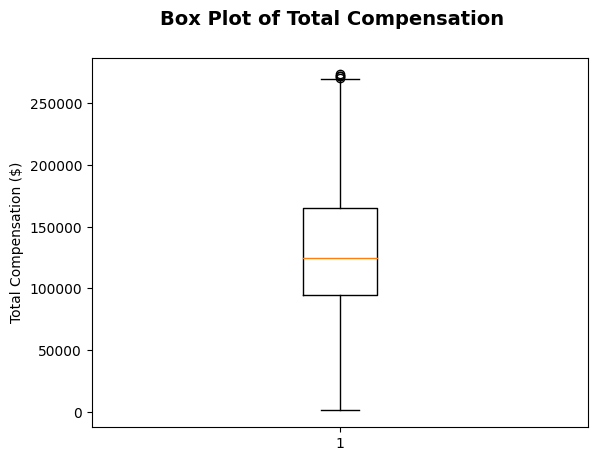

In [519]:
import matplotlib.pyplot as plt

fig = plt.figure()
fig.suptitle('Box Plot of Total Compensation', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
ax.boxplot(levels_df["total_comp"])
ax.set_ylabel('Total Compensation ($)')

In [362]:
q4, q3, q2, q1 = np.percentile(levels_df["total_comp"], [95, 75 ,25, 5])
print(np.percentile(levels_df["total_comp"], [95, 75 ,25, 5]))

[235000. 165000.  95000.  65000.]


### Binning Continous Variables

In [365]:
percentile = []

for comp in levels_df["total_comp"].to_list():
    if(q1 >= comp):
        percentile.append(f"5th / >${q1}")
    elif(q2 >= comp):
        percentile.append(f"25th / >${q2}")
    elif(q3 >= comp):
        percentile.append(f"75th / >${q3}")
    else:
        percentile.append(f"95th / >${q4}")

levels_df = levels_df.drop('total_comp',axis=1)
levels_df["target_total_comp"] = percentile

# Model Building

### Scaling Data to Fit the Normal

In [378]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()

levels_df["state_median_income"] = scaler.fit_transform(levels_df["state_median_income"].to_numpy().reshape(-1, 1))
levels_df["total_yrs_exp"] = scaler.fit_transform(levels_df["total_yrs_exp"].to_numpy().reshape(-1, 1))
levels_df["company_yrs_exp"] = scaler.fit_transform(levels_df["company_yrs_exp"].to_numpy().reshape(-1, 1))

### Etracting Target

In [367]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import train_test_split

y = levels_df["target_total_comp"]
x = levels_df.drop("target_total_comp",axis=1)

In [393]:
from sklearn.linear_model import LogisticRegression, SGDClassifier

### Train/Test/Validation Split

In [482]:
X_train, X_test_val, y_train, y_test_val = train_test_split(x, y, test_size=0.3)
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.33)

### Logistic Regression

In [483]:
from sklearn import metrics
lr = LogisticRegression(solver='newton-cg',multi_class='multinomial').fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [453]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr, X_val, y_val, cv=5)
print(scores)

[0.51851852 0.525      0.55       0.4875     0.5375    ]


#### Model Statistics

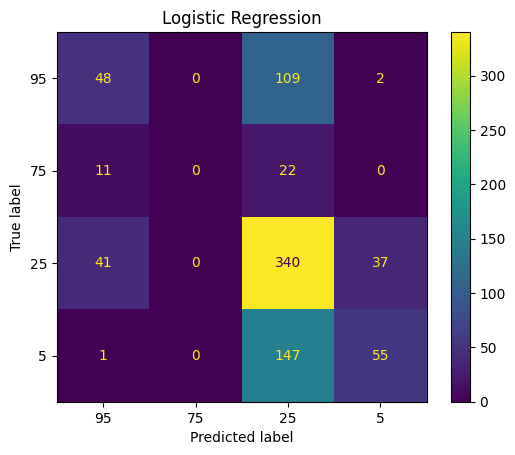

Accuracy: 0.5448954489544895
Precision: 0.4026289300072333
Recall: 0.3465549705576415
F1-Score: 0.34899294899294897


In [484]:
cm = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [95,75,25,5])
cm_display.plot()
cm_display.ax_.set_title("Logistic Regression")
plt.show()
print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred)}")
print(f"Precision: {metrics.precision_score(y_test, y_pred, average='macro')}")
print(f"Recall: {metrics.recall_score(y_test, y_pred, average='macro')}")
print(f"F1-Score: {metrics.f1_score(y_test, y_pred, average='macro')}")

### K Nearest Neighbors

#### Hyperparameter Tuning

In [485]:
from sklearn.neighbors import KNeighborsClassifier
for i in [2,3,5,7,10,20,50,100]:
    knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn, X_val, y_val, cv=5, scoring='f1_macro')
    print(f"{i}: {scores}")

2: [0.28673913 0.33863636 0.35975469 0.38558253 0.26189669]
3: [0.28378788 0.29057692 0.33770969 0.38784618 0.28966158]
5: [0.26024363 0.31739532 0.34469384 0.39099021 0.29370945]
7: [0.26858766 0.28568048 0.37627719 0.40457875 0.31385281]
10: [0.26121627 0.30544878 0.34592704 0.37713639 0.27395833]
20: [0.27788878 0.32189638 0.33776792 0.39526523 0.26021627]
50: [0.28575036 0.31176245 0.26045918 0.19761905 0.25816993]
100: [0.18733274 0.16101695 0.16101695 0.15811966 0.18170426]


#### Model Statistics

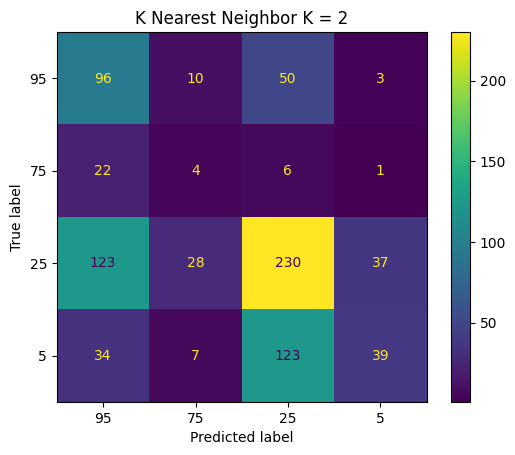

Accuracy: 0.45387453874538747
Precision: 0.37014268760404806
Recall: 0.3668357917921319
F1-Score: 0.34295074780564067


In [487]:
cm = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [95,75,25,5])
cm_display.plot()
cm_display.ax_.set_title("K Nearest Neighbor K = 2")
plt.show()
print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred)}")
print(f"Precision: {metrics.precision_score(y_test, y_pred, average='macro')}")
print(f"Recall: {metrics.recall_score(y_test, y_pred, average='macro')}")
print(f"F1-Score: {metrics.f1_score(y_test, y_pred, average='macro')}")

### Decision Tree

#### Hyperparameter Tuning

In [ ]:
from sklearn.tree import DecisionTreeClassifier
for i in [2,3,5,7,10,20,50,100]:
    d_tree = DecisionTreeClassifier(min_samples_split=i)
    scores = cross_val_score(d_tree, X_val, y_val, cv=5, scoring='f1_macro')
    print(f"{i}: {scores}")

In [489]:
d_tree = tree.DecisionTreeClassifier(min_samples_split=7).fit(X_train,y_train)
y_pred = d_tree.predict(X_test)

#### Model Statistics

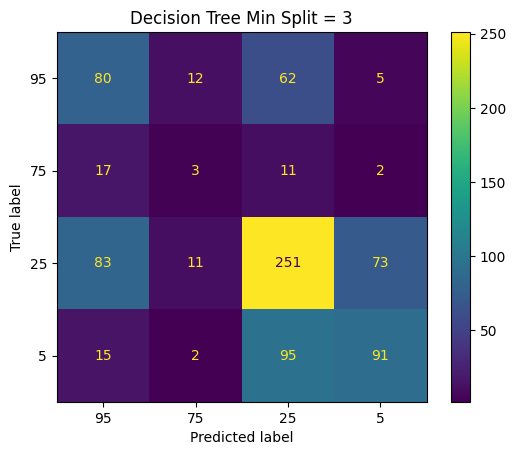

Accuracy: 0.5227552275522755
Precision: 0.4121520890378446
Recall: 0.41070201899140707
F1-Score: 0.409182531071096


In [490]:
cm = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [95,75,25,5])
cm_display.plot()
cm_display.ax_.set_title("Decision Tree Min Split = 3")
plt.show()
print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred)}")
print(f"Precision: {metrics.precision_score(y_test, y_pred, average='macro')}")
print(f"Recall: {metrics.recall_score(y_test, y_pred, average='macro')}")
print(f"F1-Score: {metrics.f1_score(y_test, y_pred, average='macro')}")